# Derivatives refresher

In calculus, we often want to find the slope of a curve at a specific point, not just the slope of a straight line. Derivatives are a way of finding **the instantaneous rate of change** or **the slope** of a function at any point.

A derivative in calculus is a measure of how a function changes as its input changes. It's like the speedometer of a car; it tells you how fast you're going at any point in time. In mathematical terms, the derivative of a function at a certain point is the slope of the line tangent to the function at that point.

In the context of a graph, the tangent line at a point on a curve gives us a good approximation of the curve near the point. This is because the tangent line and the curve have the same slope at that point, so they are "heading in the same direction".

The slope of a tangent line is given by the derivative of the function at that point. This effectively measures how the function changes at that point.

The idea behind a derivative of `f(x)`: you would take a very small difference in `x` and divide it by the corresponding difference in `y` to get the slope of the function at that point. By making the difference in `x` smaller and smaller, you can get a more accurate slope.

The derivative of a function is often written as `f'(x)`, or `df/dx`. Both notations mean the same thing: the derivative of `f` with respect to `x`.

In [19]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np

## Our first derivatives rule: the constant rule

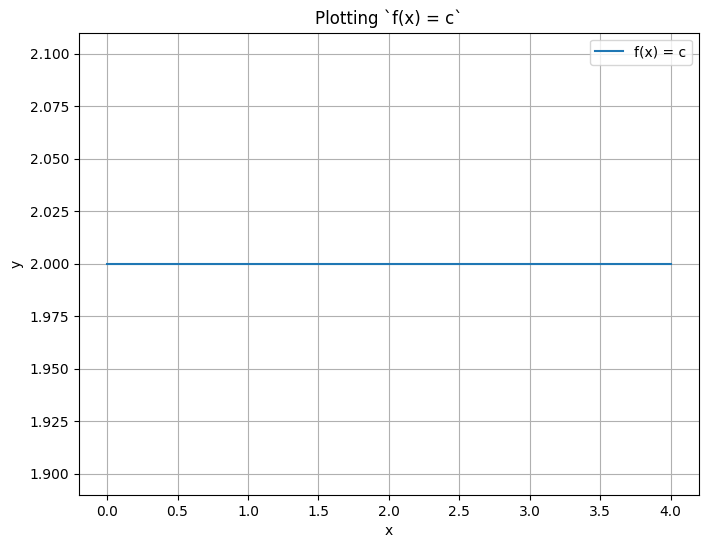

In [20]:
# let's illustrate our first derivatives rule: the constant rule
# e.g.: the derivative of a constant is 0

some_constant = 2
def derivative_constant_rule(x):
    # `np.full_like(x, some_constant)` creates a new array with the same shape and data type as the `x` array,
    # and fills it with the value `some_constant`,
    # this is useful for creating an array of constants with the same shape as another array
    return np.full_like(x, some_constant)

# Create an array of x values
x = np.linspace(0, 4)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, derivative_constant_rule(x), label="f(x) = c")
plt.legend()
plt.grid(True)
plt.title("Plotting `f(x) = c`")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# as you can see in the graph below, the derivative of a constant is 0

## the power rule of derivatives

The derivative of $x^n$ is $nx^{n-1}$.

The derivative of a function at a certain point is the slope of the line tangent to the function at that point.
In the context of a graph, the tangent line at a point on a curve gives us a good approximation of the curve near the point. This is because the tangent line and the curve have the same slope at that point, so they are "heading in the same direction".

Based on the equation of a straight line, $y = mx + b$, we can then write the equation of the tangent line of our power rule derivative as:

$$y = (nx^{n-1})x + x^n$$

... but this would give us the equation of the tangent of any line with the correct slope. What we want is the point of tangency, which would be `(some_x_coord, (x^n))`, and not just `x^n`.

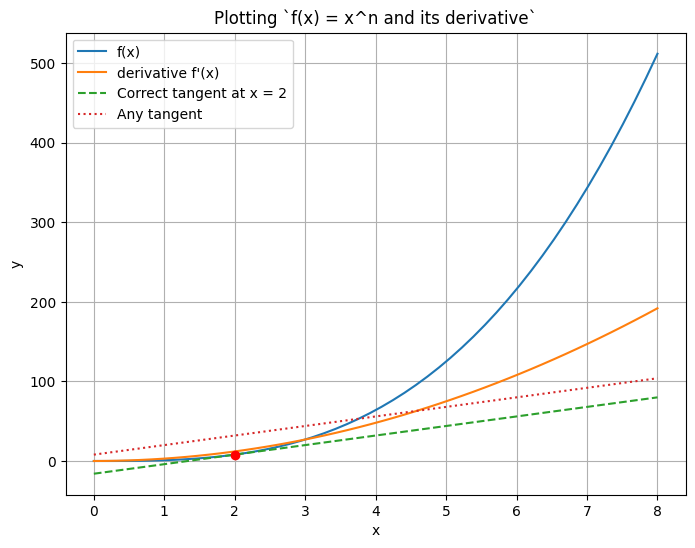

In [21]:
# let's illustrate the power rule

def parent_function(x, n):
    return x ** n

def derivative_power_rule(x, n):
    # `np.full_like(x, some_constant)` creates a new array with the same shape and data type as the `x` array,
    # and fills it with the value `some_constant`,
    # this is useful for creating an array of constants with the same shape as another array
    return n * (x ** (n - 1))

def tangent_line(x, a, n):
    # this comes from the equation of the tangent line => `y=f'(a)(x−a)+f(a)` `a` being the point where we want to draw the tangent line
    return derivative_power_rule(a, n) * (x - a) + parent_function(a, n)

# Define a function to calculate the tangent of any line of the parent function with the correct slope
    # we do this to illustrate the `x - a` part of the tangent line equation above:
        # we want to intersect `y` at the point of tangency `(a, parent_function(a, n))` and not just at `parent_function(0, n)`
def any_tangent_line(x, a, n):
    return derivative_power_rule(a, n) * x + parent_function(a, n)

# Choose a point to draw the tangent line
a = 2

# Choose a value for n
n = 3

# Create an array of x values
x = np.linspace(0, 4)

# Generate y values for the function, correct tangent line, and incorrect tangent line
y = parent_function(x, n)
tangent = tangent_line(x, a, n)
any_tangent = any_tangent_line(x, a, n)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot the parent function and its derivative
plt.plot(x, parent_function(x, n), label="f(x)")
plt.plot(x, derivative_power_rule(x, n), label="derivative f'(x)")

# Plot the correct and incorrect tangent lines
plt.plot(x, tangent, label='Correct tangent at x = {}'.format(a), linestyle='--')
plt.plot(x, any_tangent, label='Any tangent', linestyle=':')

# Add a dot for the point of tangency
plt.plot(a, parent_function(a,n), 'ro')

plt.legend()
plt.grid(True)
plt.title("Plotting `f(x) = x^n and its derivative`")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
